In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

print(os.listdir('../data/signate_titanic'))

['.DS_Store', 'train.tsv', 'output', 'test.tsv', '.ipynb_checkpoints']


In [2]:
df_train = pd.read_csv('../data/signate_titanic/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/signate_titanic/test.tsv', delimiter='\t')

In [3]:
df_train.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,1,female,35.0,1,0,53.1000,S
1,4,0,3,male,35.0,0,0,8.0500,S
2,7,0,3,male,2.0,3,1,21.0750,S
3,9,1,2,female,14.0,1,0,30.0708,C
4,11,1,1,female,58.0,0,0,26.5500,S


In [4]:
df_train.isnull().sum()

id           0
survived     0
pclass       0
sex          0
age         85
sibsp        0
parch        0
fare         0
embarked     2
dtype: int64

In [5]:
df_test.isnull().sum()

id           0
pclass       0
sex          0
age         92
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64

In [6]:
df_train['age'] = df_train['age'].fillna(100)
df_test['age'] = df_test['age'].fillna(100)

In [7]:
display(df_train[df_train['embarked'].isnull()])

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
27,61,1,1,female,38.0,0,0,80.0,NaN
412,829,1,1,female,62.0,0,0,80.0,NaN


In [8]:
df_train['embarked'] = df_train['embarked'].fillna('S')

survived    0   1
pclass           
1          34  74
2          54  43
3         178  62


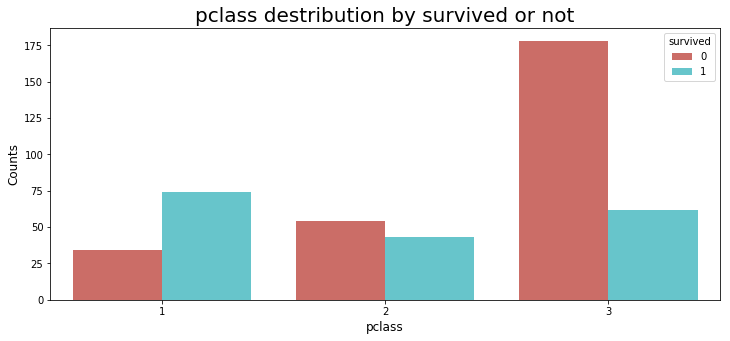

In [9]:
print(pd.crosstab(df_train['pclass'], df_train['survived']))

plt.figure(figsize=(12, 5))
sns.countplot(x='pclass', hue='survived', data=df_train, palette='hls')
plt.title('pclass destribution by survived or not', fontsize=20)
plt.xlabel('pclass', fontsize=12)
plt.ylabel('Counts', fontsize=12)

plt.show()

In [10]:
df_train['age'].describe()

count    445.000000
mean      42.732966
std       30.627822
min        0.670000
25%       22.000000
50%       32.000000
75%       50.000000
max      100.000000
Name: age, dtype: float64

In [11]:
interval = (0, 5, 12, 18, 24, 60, 100)
label_name = ['baby', 'child', 'yaung', 'student', 'adult', 'senior']

df_train['age'] = pd.cut(df_train['age'], interval, labels=label_name)
df_test['age'] = pd.cut(df_test['age'], interval, labels=label_name)

In [12]:
df_train.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,1,female,adult,1,0,53.1000,S
1,4,0,3,male,adult,0,0,8.0500,S
2,7,0,3,male,baby,3,1,21.0750,S
3,9,1,2,female,yaung,1,0,30.0708,C
4,11,1,1,female,adult,0,0,26.5500,S


In [13]:
df_train['family'] = df_train['sibsp'] * df_train['parch'] + 1
df_test['family'] = df_test['sibsp'] * df_test['parch'] + 1

In [14]:
df_train['fare'].describe()

count    445.000000
mean      33.959971
std       52.079492
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      512.329200
Name: fare, dtype: float64

In [15]:
interval = (-1, 8, 15, 32, 600)
label_name = ['first', 'second', 'third', 'forth']

df_train['fare'] = pd.cut(df_train['fare'], interval, labels=label_name)
df_test['fare'] = pd.cut(df_test['fare'], interval, labels=label_name)

In [16]:
columns = ['pclass', 'sex', 'age', 'fare', 'embarked']
prefix = ['pclass', 'sex', 'age', 'fare', 'emb']

df_train = pd.get_dummies(df_train, columns=columns, prefix=prefix)
df_test = pd.get_dummies(df_test, columns=columns, prefix=prefix)

In [17]:
Drop_train = ['id', 'survived', 'sibsp', 'parch']
Drop_test = ['id', 'sibsp', 'parch']

In [18]:
print(df_train.shape, df_test.shape)

(445, 23) (446, 22)


In [19]:
train = df_train.drop(Drop_train, axis=1)
train_ = df_train['survived']
test = df_test.drop(Drop_test, axis=1)

X_train = train.values
y_train = train_.values
X_test = test.values
X_test = X_test.astype(np.float, copy=False)

In [20]:
print(X_train.shape, y_train.shape, X_test.shape)

(445, 19) (445,) (446, 19)


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import Adam, SGD, RMSprop
import graphviz

Using TensorFlow backend.


In [23]:
model = Sequential()

model.add(Dense(100, activation='relu', input_dim=19, kernel_initializer='uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,021
Trainable params: 3,021
Non-trainable params: 0
___________________

In [24]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
445/445 [==============================] - 0s 1ms/step - loss: 0.6904 - acc: 0.6562
Epoch 2/100
445/445 [==============================] - 0s 224us/step - loss: 0.6694 - acc: 0.7371
Epoch 3/100
445/445 [==============================] - 0s 205us/step - loss: 0.5847 - acc: 0.7933
Epoch 4/100
445/445 [==============================] - 0s 221us/step - loss: 0.5101 - acc: 0.7910
Epoch 5/100
445/445 [==============================] - 0s 194us/step - loss: 0.4949 - acc: 0.7955
Epoch 6/100
445/445 [==============================] - 0s 197us/step - loss: 0.4808 - acc: 0.8090
Epoch 7/100
445/445 [==============================] - 0s 211us/step - loss: 0.4727 - acc: 0.8292
Epoch 8/100
445/445 [==============================] - 0s 197us/step - loss: 0.4722 - acc: 0.8292
Epoch 9/100
445/445 [==============================] - 0s 188us/step - loss: 0.4655 - acc: 0.8292
Epoch 10/100
445/445 [==============================] - 0s 290us/step - 

445/445 [==============================] - 0s 284us/step - loss: 0.3861 - acc: 0.8539
Epoch 82/100
445/445 [==============================] - 0s 316us/step - loss: 0.3813 - acc: 0.8539
Epoch 83/100
445/445 [==============================] - 0s 283us/step - loss: 0.3944 - acc: 0.8315
Epoch 84/100
445/445 [==============================] - 0s 251us/step - loss: 0.3791 - acc: 0.8584
Epoch 85/100
445/445 [==============================] - 0s 289us/step - loss: 0.3798 - acc: 0.8562
Epoch 86/100
445/445 [==============================] - 0s 283us/step - loss: 0.3945 - acc: 0.8472
Epoch 87/100
445/445 [==============================] - 0s 285us/step - loss: 0.3840 - acc: 0.8382
Epoch 88/100
445/445 [==============================] - 0s 250us/step - loss: 0.3894 - acc: 0.8494
Epoch 89/100
445/445 [==============================] - 0s 201us/step - loss: 0.3687 - acc: 0.8584
Epoch 90/100
445/445 [==============================] - 0s 205us/step - loss: 0.3619 - acc: 0.8697
Epoch 91/100
445/445 [=

In [25]:
scores = model.evaluate(X_train, y_train, batch_size=40)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))

445/445 [==============================] - 0s 173us/step
acc : 87.19%


In [26]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=180, batch_size=20, verbose=0)
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


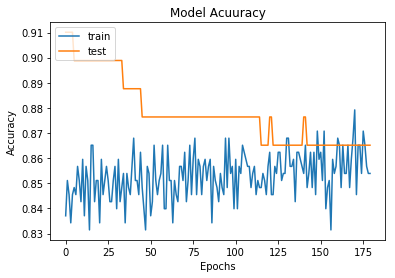

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Acuuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

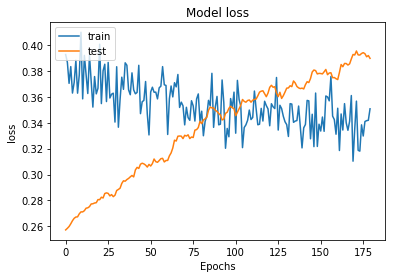

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
predict = model.predict(X_test)

df_out = pd.read_csv('../data/signate_titanic/test.tsv', delimiter='\t')
df_out['survived'] = predict
#df_out['survived'] = df_out['survived'].map({1:0, 0:1})
#df_out['survived'] = df_out['survived'].map({1:0, 0:1})

df_out[['id', 'survived']].to_csv('../data/signate_titanic/output/latest.tsv', sep='\t', index=False, header=False)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

LogReg: 0.791002 (+/- 0.045846)
XGBClassifier: 0.795396 (+/- 0.051218)
KNN: 0.786582 (+/- 0.022955)
DecisionTreeClassifier: 0.806708 (+/- 0.041161)
RandomForestClassifier: 0.815520 (+/- 0.046417)
GradientBoostingClassifier: 0.804461 (+/- 0.039404)
RidgeClassifier: 0.793325 (+/- 0.042753)
BaggingRidgeClassifier: 0.800016 (+/- 0.030377)
ExtraTreesClassifier: 0.813273 (+/- 0.037490)


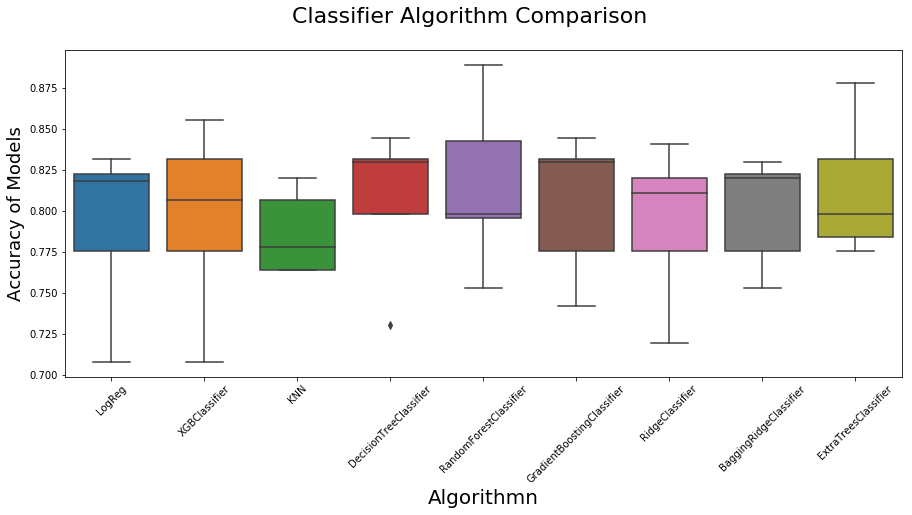

In [33]:
clfs = []
seed = 3

clfs.append(('LogReg', Pipeline([('Scaler', StandardScaler()), ('LogReg', LogisticRegression())])))
clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

scoring = 'accuracy'
n_folds = 7

results, names = [], []

for name, model in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
    names.append(name)
    results.append(cv_results)
    msg = '%s: %f (+/- %f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel('Algorithmn', fontsize=20)
ax.set_ylabel('Accuracy of Models', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

predict = forest.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [37]:
df_out = pd.read_csv('../data/signate_titanic/test.tsv', delimiter='\t')
df_out['survived'] = predict

df_out[['id', 'survived']].to_csv('../data/signate_titanic/output/forest.tsv', sep='\t', index=False, header=False)